In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import cv2

def read_img(img_path):
    """
        Read grayscale image
        Inputs:
        img_path: str: image path
        Returns:
        img: cv2 image
    """
    return cv2.imread(img_path, 0)

In [5]:
instance = read_img("ex1_images/noise.png")

In [6]:
type(instance)

numpy.ndarray

In [13]:
def padding_img(img, filter_size=3):
    """
    The surrogate function for the filter functions.
    The goal of the function: replicate padding the image such that when applying the kernel with the size of filter_size, the padded image will be the same size as the original image.
    WARNING: Do not use the exterior functions from available libraries such as OpenCV, scikit-image, etc. Just do from scratch using function from the numpy library or functions in pure Python.
    Inputs:
        img: cv2 image: original image
        filter_size: int: size of square filter
    Return:
        padded_img: cv2 image: the padding image
    """
    height, width = img.shape
    # new_height = height + filter_size - 1
    # new_width = width + filter_size - 1
    
    # must pad each axis (filter_size - 1) padder, and each side in each direction will be (filter_size - 1) // 2

    padded_add = (filter_size - 1) // 2
    new_height, new_width = height + padded_add * 2, width + padded_add * 2
    padded_img = np.zeros((new_height, new_width), dtype=np.uint8)
    for x in range(padded_add, new_height - padded_add):
        for y in range(padded_add, new_width - padded_add):
            padded_img[x][y] = img[x-padded_add][y-padded_add]
    
    #for corner pixel
    for x in range(padded_add+1):
        for y in range(padded_add+1):
            padded_img[x][y] = img[0][0]
            padded_img[new_height-x-1][y] = img[-1][0]
            padded_img[x][new_width-y-1] = img[0][-1]
            padded_img[new_height-x-1][new_width-y-1] = img[-1][-1]

    #for other border pixel
    for x in range(padded_add + 1, new_height - padded_add - 1):
        for y in range(padded_add):
            padded_img[x][y] = img[x-padded_add][0]
            padded_img[x][new_width-y-1] = img[x-padded_add][-1]

    for y in range(padded_add + 1, new_width - padded_add - 1):
        for x in range(padded_add):
            padded_img[x][y] = img[0][y-padded_add]
            padded_img[new_height-x-1][y] = img[-1][y-padded_add]
    
    return padded_img


padding_img(instance)

array([[241, 241, 242, ...,  63,  69,  69],
       [241, 241, 242, ...,  63,  69,  69],
       [251, 251, 251, ...,   0,  73,  73],
       ...,
       [176, 176, 177, ..., 241, 241, 241],
       [170, 170, 172, ..., 243, 243, 243],
       [170, 170, 172, ..., 243, 243, 243]], dtype=uint8)

In [14]:
instance

array([[241, 242, 243, ...,  64,  63,  69],
       [251, 251, 251, ...,  65,   0,  73],
       [254, 254, 254, ...,  68,  70,  77],
       ...,
       [178, 179, 178, ..., 240, 240, 240],
       [176, 177, 178, ..., 242, 241, 241],
       [170, 172, 174, ..., 247, 243, 243]], dtype=uint8)

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import os


def read_img(img_path):
    """
    Read grayscale image
    Inputs:
    img_path: str: image path
    Returns:
    img: cv2 image
    """
    return cv2.imread(img_path, 0)


def padding_img(img, filter_size=3):
    """
    The surrogate function for the filter functions.
    The goal of the function: replicate padding the image such that when applying the kernel with the size of filter_size, the padded image will be the same size as the original image.
    WARNING: Do not use the exterior functions from available libraries such as OpenCV, scikit-image, etc. Just do from scratch using function from the numpy library or functions in pure Python.
    Inputs:
        img: cv2 image: original image
        filter_size: int: size of square filter
    Return:
        padded_img: cv2 image: the padding image
    """
    height, width = img.shape
    # new_height = height + filter_size - 1
    # new_width = width + filter_size - 1

    # must pad each axis (filter_size - 1) padder, and each side in each direction will be (filter_size - 1) // 2

    padded_add = (filter_size - 1) // 2
    new_height, new_width = height + padded_add * 2, width + padded_add * 2
    padded_img = np.zeros((new_height, new_width), dtype=np.uint8)
    for x in range(padded_add, new_height - padded_add):
        for y in range(padded_add, new_width - padded_add):
            padded_img[x][y] = img[x - padded_add][y - padded_add]

    # for corner pixel
    for x in range(padded_add + 1):
        for y in range(padded_add + 1):
            padded_img[x][y] = img[0][0]
            padded_img[new_height - x - 1][y] = img[-1][0]
            padded_img[x][new_width - y - 1] = img[0][-1]
            padded_img[new_height - x - 1][new_width - y - 1] = img[-1][-1]

    # for other border pixel
    for x in range(padded_add + 1, new_height - padded_add - 1):
        for y in range(padded_add):
            padded_img[x][y] = img[x - padded_add][0]
            padded_img[x][new_width - y - 1] = img[x - padded_add][-1]

    for y in range(padded_add + 1, new_width - padded_add - 1):
        for x in range(padded_add):
            padded_img[x][y] = img[0][y - padded_add]
            padded_img[new_height - x - 1][y] = img[-1][y - padded_add]

    return padded_img


def mean_filter(img, filter_size=3):
    """
    Smoothing image with mean square filter with the size of filter_size. Use replicate padding for the image.
    WARNING: Do not use the exterior functions from available libraries such as OpenCV, scikit-image, etc. Just do from scratch using function from the numpy library or functions in pure Python.
    Inputs:
        img: cv2 image: original image
        filter_size: int: size of square filter,
    Return:
        smoothed_img: cv2 image: the smoothed image with mean filter.
    """
    padded_img = padding_img(img, filter_size)

    height, width = img.shape
    smoothed_img = np.zeros((height, width), dtype=float)

    for x in range(height):
        for y in range(width):
            smoothed_img[x][y] += sum(
                padded_img[xx][yy]
                for xx in range(x, x + filter_size)
                for yy in range(y, y + filter_size)
            )
            smoothed_img[x][y] /= filter_size**2

    return smoothed_img


import time
def median_filter(img, filter_size=3):
    """
    Smoothing image with median square filter with the size of filter_size. Use replicate padding for the image.
    WARNING: Do not use the exterior functions from available libraries such as OpenCV, scikit-image, etc. Just do from scratch using function from the numpy library or functions in pure Python.
    Inputs:
        img: cv2 image: original image
        filter_size: int: size of square filter
    Return:
        smoothed_img: cv2 image: the smoothed image with median filter.
    """
    padded_img = padding_img(img, filter_size)


    height, width = img.shape
    smoothed_img = np.zeros((height, width), dtype=float)

    median_index = (filter_size**2) // 2
    for x in range(height):
        for y in range(width):
            pixels = list(
                padded_img[xx][yy]
                for xx in range(x, x + filter_size)
                for yy in range(y, y + filter_size)
            )
            smoothed_img[x][y] = sorted(pixels)[median_index]


    return smoothed_img


def psnr(gt_img, smooth_img):
    """
    Calculate the PSNR metric
    Inputs:
        gt_img: cv2 image: groundtruth image
        smooth_img: cv2 image: smoothed image
    Outputs:
        psnr_score: PSNR score
    """

    # Formula can be found here: https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio
    dtype = gt_img.dtype
    height, width = gt_img.shape
    maxi = 255
    mse = sum(
        (gt_img[x][y] - smooth_img[x][y]) ** 2
        for x in range(height)
        for y in range(width)
    ) / (height * width)

    psnr = 20 * math.log10(maxi) - 10 * math.log10(mse)

    return psnr


def show_res(before_img, after_img):
    """
    Show the original image and the corresponding smooth image
    Inputs:
        before_img: cv2: image before smoothing
        after_img: cv2: corresponding smoothed image
    Return:
        None
    """
    plt.figure(figsize=(12, 9))
    plt.subplot(1, 2, 1)
    plt.imshow(before_img, cmap="gray")
    plt.title("Before")

    plt.subplot(1, 2, 2)
    plt.imshow(after_img, cmap="gray")
    plt.title("After")
    plt.show()





In [7]:
img_noise = "ex1_images/noise.png"
img_gt = "ex1_images/ori_img.png"
img = read_img(img_noise)
filter_size = 3

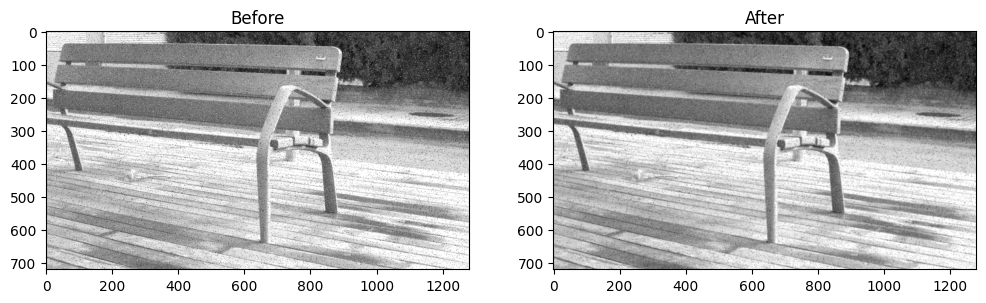

PSNR score of mean filter:  18.295335205529753


In [12]:
mean_smoothed_img = mean_filter(img, filter_size)
show_res(img, mean_smoothed_img)
print("PSNR score of mean filter: ", psnr(img, mean_smoothed_img))

Start padding image: 13:16:38
End padding image: 13:16:38
Start median image: 13:16:38
End median image: 13:16:41


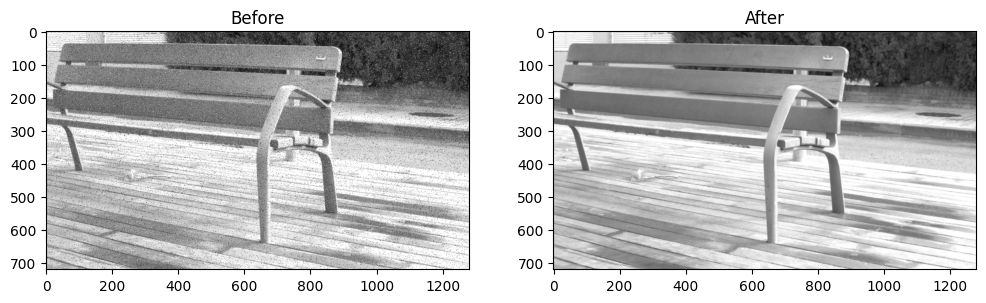

PSNR score of median filter:  17.835212311092132


In [11]:
median_smoothed_img = median_filter(img, filter_size)
show_res(img, median_smoothed_img)
print("PSNR score of median filter: ", psnr(img, median_smoothed_img))
